In [1]:
# Importing required libraries
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import datetime as dt1
from datetime import datetime as dt
import quandl
import datetime
import scipy

# Getting the google dataset
# and store it in the variable 'df'
API_KEY = str(open('./../API.txt').read()).replace('\n', '')
df = quandl.get("WIKI/GOOG", api_key=API_KEY)

print(df.tail())


/home/cosmin/Documents/Facultate/SI/Proiect2/ML-stock-market-prediction/venv/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


               Open     High      Low    Close     Volume  Ex-Dividend  \
Date                                                                     
2018-03-21  1092.74  1106.30  1085.15  1090.88  1640709.0          0.0   
2018-03-22  1081.88  1082.90  1045.91  1049.08  2580374.0          0.0   
2018-03-23  1047.03  1063.36  1021.22  1021.57  2113497.0          0.0   
2018-03-26  1046.00  1055.63  1008.40  1053.21  2558385.0          0.0   
2018-03-27  1063.00  1064.84   996.92  1005.10  3029471.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
2018-03-21          1.0    1092.74    1106.30   1085.15     1090.88   
2018-03-22          1.0    1081.88    1082.90   1045.91     1049.08   
2018-03-23          1.0    1047.03    1063.36   1021.22     1021.57   
2018-03-26          1.0    1046.00    1055.63   1008.40     1053.21   
2018-03-27          1.0    1063.00    1064.84    996.92

In [2]:
# We are gonna use Adj. Close in order to predict the stock
df = df[['Adj. Close']]
df

,Adj. Close
Date,
2014-03-27,558.46
2014-03-28,559.99
2014-03-31,556.97
2014-04-01,567.16
2014-04-02,567.00
2014-04-03,569.74
2014-04-04,543.14
2014-04-07,538.15
2014-04-08,554.90


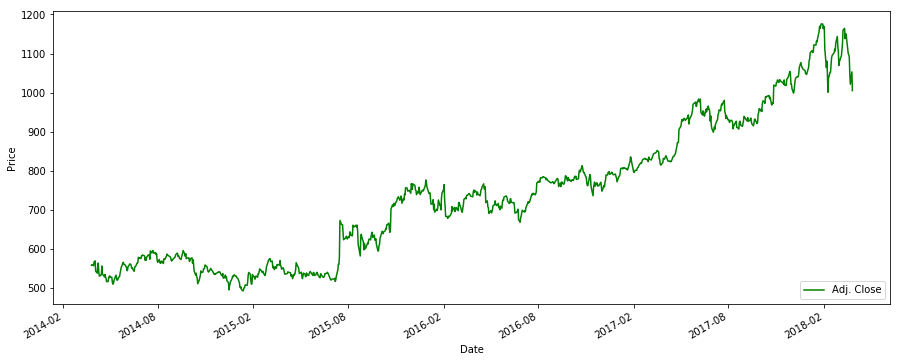

In [3]:
# forecast_out variable is keeping track of how many days into the future we want to predict
forecast_out = int(30) # 30 days into the future
df['Prediction'] = df[['Adj. Close']].shift(-forecast_out)

# printing a plot to show the evolution of Google stock in time
df['Adj. Close'].plot(figsize=(15, 6), color="green")
# creating the labels 
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [4]:
X = np.array(df.drop(['Prediction'], 1))
# scaling our features to normalize data
X = preprocessing.scale(X)
X

array([[-1.01398948],
       [-1.00530839],
       [-1.02244361],
       ...,
       [ 1.61365657],
       [ 1.79317919],
       [ 1.52020722]])

In [5]:
X_forecast = X[-forecast_out:] # set X_forecast equal to last 30
X = X[:-forecast_out] # remove last 30 from X

# y is going to be our prediction array 
Y = np.array(df['Prediction'])
Y = Y[:-forecast_out]
print(Y)

[ 518.73    529.92    533.09    526.65    519.98    520.63    528.86
  529.77    538.94    545.06    552.7     565.95    561.68    560.08
  559.89    553.93    544.94    544.66    553.9     556.33    562.12
  560.55    558.84    551.35    551.76    544.28    543.01    553.37
  554.9     556.36    564.95    564.62    578.65    576.      577.24
  575.28    582.67    582.335   584.73    582.25    571.09    576.08
  571.1     579.18    584.87    584.78    582.66    573.7299  595.08
  589.47    594.74    595.98    593.35    589.02    590.6     585.61
  587.42    571.6     566.07    573.15    565.07    566.374   563.36
  568.77    567.88    562.73    574.78    574.65    573.48    582.16
  586.86    584.49    583.37    582.56    580.2     577.86    571.
  569.2     571.6     577.33    577.94    581.98    586.08    589.72
  581.01    583.1     581.35    575.62    573.1     579.95    584.77
  589.27    596.08    587.37    581.13    587.99    575.06    577.1
  576.36    577.36    568.27    570.0

In [6]:
# we take 20% of the train data and use it for prediction
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=0.2)

# LINEAR REGRESSION 
# Training our algorithm
clf = LinearRegression()
clf.fit(X_train, Y_train)
accuracy = clf.score(X_test, Y_test)
print("Accuracy: ", accuracy)


Accuracy:  0.9246905605111472


In [7]:
# showing the last 30 days
forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

[1072.73334568 1090.55964874 1110.63449685 1115.98238777 1123.74088103
 1132.73506121 1127.96449943 1148.3837193  1165.56179316 1139.77442521
 1126.04006898 1090.37733428 1099.89820069 1112.06262681 1116.24573088
 1131.0132024  1147.58356138 1182.06125208 1186.57859933 1159.91004481
 1171.37559882 1171.46675605 1157.43867097 1121.06693557 1118.92980492
 1112.0119839  1069.67451413 1041.81078701 1073.8576182  1025.12901363]


Last date:  2018-02-12 00:00:00


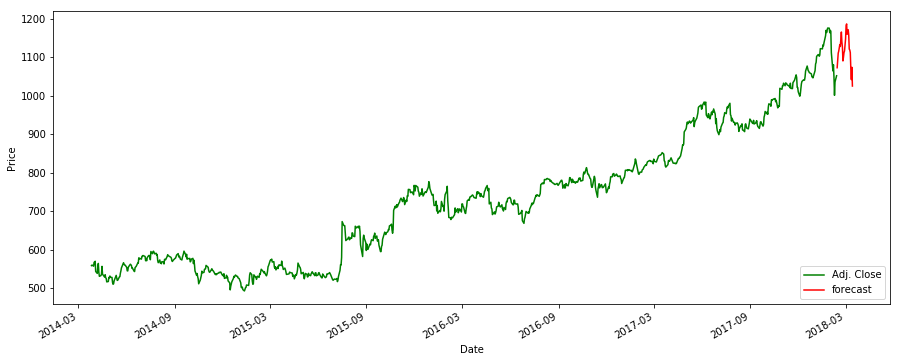

In [8]:
# Ploting the predicted prices
df.dropna(inplace=True)
# initialiseing a new column called forecast with nan
df['forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

print('Last date: ',last_date)
# print('Last unix: ', last_unix)


# adding predictions to the data frame to create the next 30 days
for i in forecast_prediction:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) - 1)] + [i]

df['Adj. Close'].plot(figsize=(15,6), color="green")
df['forecast'].plot(figsize=(15,6), color="red")
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [9]:
# SUPORT VECTOR MACHINE PREDICTION

# initialising lists used for prediction
prices = []
dates = []

# getting data frame
df = quandl.get("WIKI/GOOG")
# selecting only the features I would need 
df = df[['Adj. Close']]
df = df.reset_index()

# print(df['Date'].dt.days)
#print(df['Date'])
# print('After conversion')
# for row in df['Date']:
#     print(np.datetime64(row))
#     dt64 = np.datetime64(row)
#     ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
#     print(ts)

# interate over rows in pandas
# row[0] - date
# row[1] - price
# scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
for _, row in df.iterrows():
    #dates.append(int(str(row[0]).split('-')[2].split(' ')[0]))
    dt64 = np.datetime64(row[0])
    # switch to hours
    ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 'D')
    print(ts)
    #print(ts)np.timedelta64(1, 's')
    dates.append(ts)
    prices.append(float(row[1]))


# normalizing data
#dates = [number/scipy.linalg.norm(dates) for number in dates]

print(dates)
# print(dates)
# print(prices)

/home/cosmin/Documents/Facultate/SI/Proiect2/ML-stock-market-prediction/venv/lib/python3.6/site-packages/ipykernel_launcher.py:30: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future


16156.0
16157.0
16160.0
16161.0
16162.0
16163.0
16164.0
16167.0
16168.0
16169.0
16170.0
16171.0
16174.0
16175.0
16176.0
16177.0
16181.0
16182.0
16183.0
16184.0
16185.0
16188.0
16189.0
16190.0
16191.0
16192.0
16195.0
16196.0
16197.0
16198.0
16199.0
16202.0
16203.0
16204.0
16205.0
16206.0
16209.0
16210.0
16211.0
16212.0
16213.0
16217.0
16218.0
16219.0
16220.0
16223.0
16224.0
16225.0
16226.0
16227.0
16230.0
16231.0
16232.0
16233.0
16234.0
16237.0
16238.0
16239.0
16240.0
16241.0
16244.0
16245.0
16246.0
16247.0
16248.0
16251.0
16252.0
16253.0
16254.0
16258.0
16259.0
16260.0
16261.0
16262.0
16265.0
16266.0
16267.0
16268.0
16269.0
16272.0
16273.0
16274.0
16275.0
16276.0
16279.0
16280.0
16281.0
16282.0
16283.0
16286.0
16287.0
16288.0
16289.0
16290.0
16293.0
16294.0
16295.0
16296.0
16297.0
16300.0
16301.0
16302.0
16303.0
16304.0
16307.0
16308.0
16309.0
16310.0
16311.0
16315.0
16316.0
16317.0
16318.0
16321.0
16322.0
16323.0
16324.0
16325.0
16328.0
16329.0
16330.0
16331.0
16332.0
16335.0
16336.0


In [10]:
# svr_lin = SVR(kernel='linear', C=1e3)
# svr_poly = SVR(kernel='poly', C=1e3, degree=2)
# svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

# # SV needs a 2D array so I am converting the 1D data to 2D 
# dates = np.reshape(dates, (len(dates), 1))


# # start fiting
# svr_rbf.fit(dates, prices) 
# svr_lin.fit(dates, prices)
# svr_poly.fit(dates, prices)


# plt.scatter(dates, prices, color= 'black', label= 'Data')
# # plotting the line made by the RBF kernel
# plt.plot(dates, svr_rbf.predict(dates), color= 'red', label= 'RBF model')
# # plotting the line made by linear kernel
# plt.plot(dates,svr_lin.predict(dates), color= 'green', label= 'Linear model') 
#  # plotting the line made by polynomial kernel
# plt.plot(dates,svr_poly.predict(dates), color= 'blue', label= 'Polynomial model')
# plt.xlabel('Date') 
# plt.ylabel('Price')
# plt.title('Support Vector Regression') 
# plt.legend() 
# plt.show()

# day = 0
# print('SVR RBF: ', svr_rbf.predict(day)[0])
# print('SVR LIN: ',svr_lin.predict(day)[0])
# print('SVR POLY: ', svr_poly.predict(day)[0])

In [12]:
# Getting data 
# extracting Features

df = quandl.get("WIKI/GOOG")
print('Before:')
print(df)
df = df[['Open','High','Low','Close','Volume']]
df['HL_PCT']= (df['High'] - df['Close']) / df['Close'] *100
df['PCT_change']= (df['High']-df['Open']) / df['Open'] *100
df=df[['Close','HL_PCT','PCT_change','Volume']]
df.head(3)
print('After:')
print(df)


Before:
                Open       High        Low    Close     Volume  Ex-Dividend  \
Date                                                                          
2014-03-27   568.000   568.0000   552.9200   558.46    13100.0          0.0   
2014-03-28   561.200   566.4300   558.6700   559.99    41100.0          0.0   
2014-03-31   566.890   567.0000   556.9300   556.97    10800.0          0.0   
2014-04-01   558.710   568.4500   558.7100   567.16     7900.0          0.0   
2014-04-02   565.106   604.8300   562.1900   567.00   146700.0          0.0   
2014-04-03   569.850   587.2800   564.1300   569.74  5085200.0          0.0   
2014-04-04   574.650   577.7700   543.0000   543.14  6351900.0          0.0   
2014-04-07   540.740   548.4800   527.1500   538.15  4389600.0          0.0   
2014-04-08   542.600   555.0000   541.6100   554.90  3142600.0          0.0   
2014-04-09   559.620   565.3700   552.9500   564.14  3321700.0          0.0   
2014-04-10   565.000   565.0000   539.9000  

In [23]:
# Processing data
import math
forecast_col = 'Close'
#no na in data but good practice
df.fillna(-99999, inplace=True)

# I switched to 7 days this time
n=7 #
forecast_out = int(math.ceil(n)) #make n integer

df['label'] = df[forecast_col].shift(-forecast_out)
print(df)

              Close    HL_PCT  PCT_change     Volume    label
Date                                                         
2014-03-27   558.46  1.708269    0.000000    13100.0   538.15
2014-03-28   559.99  1.150021    0.931932    41100.0   554.90
2014-03-31   556.97  1.800815    0.019404    10800.0   564.14
2014-04-01   567.16  0.227449    1.743302     7900.0   540.95
2014-04-02   567.00  6.671958    7.029478   146700.0   530.60
2014-04-03   569.74  3.078597    3.058700  5085200.0   532.52
2014-04-04   543.14  6.375888    0.542939  6351900.0   536.44
2014-04-07   538.15  1.919539    1.431372  4389600.0   556.54
2014-04-08   554.90  0.018021    2.285293  3142600.0   536.10
2014-04-09   564.14  0.218031    1.027483  3321700.0   528.62
2014-04-10   540.95  4.445882    0.000000  4025800.0   534.81
2014-04-11   530.60  1.771579    1.398930  3914100.0   526.94
2014-04-14   532.52  2.174566    1.086856  2568000.0   525.16
2014-04-15   536.44  0.374692    0.303640  3844500.0   516.18
2014-04-

In [24]:
# extracting features

import numpy as np
from sklearn import preprocessing, cross_validation
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X_lately= X[-forecast_out:] #shift the most recent data (e.g. 95-100)
X = X[:-forecast_out] #shift data until beginning of X_lately (e.g. 0-94)
#print(X, len(X))

df.dropna(inplace=True)
y = np.array(df['label'])
#print(len(X)==len(y))

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

In [25]:
# applying  the algorithmm
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)

# measuring accuracy
accuracy = clf.score(X_test, y_test)
print('Accuracy:', accuracy)



Accuracy: 0.9771822628651449


In [26]:
# From prev week
accuracy = clf.score(X_test[-10:],y_test[-10:])
print('Accuracy:', accuracy)

Accuracy: 0.9775328640047146


In [27]:
# Switching to ensemble learning -> RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(X_train, y_train)

# I observed that the accuracy was decreassing
accuracy = clf.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.9750007002031973


In [31]:
import math
import pandas as pd
import numpy as np

from sklearn import preprocessing, cross_validation, cross_decomposition
from sklearn.linear_model import LinearRegression as LR
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor as NR
from sklearn.tree import DecisionTreeRegressor as DR
from sklearn.ensemble import RandomForestRegressor as RR

# creating a list of regressors
regressors = [LR(), SVR(), NR(), DR(), RR()]
# storing accuracy to plot it
accuracy = []
# storing prediction
forecast = []

for regressor in regressors:
    # fitting the regressor
    regressor.fit(X_train, y_train)
    # getting the score
    a = regressor.score(X_test, y_test)
    print('Accuracy of ',str(regressor)[:3], ' is: ', a)
    accuracy.append(a)
    forecast.append(regressor.predict(X_lately))
    



Accuracy of  Lin  is:  0.9771822628651449
Accuracy of  SVR  is:  0.5865329090083855
Accuracy of  MLP  is:  -11.645990393437028
Accuracy of  Dec  is:  0.9625359496501592
Accuracy of  Ran  is:  0.9765932382866076


/home/cosmin/Documents/Facultate/SI/Proiect2/ML-stock-market-prediction/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


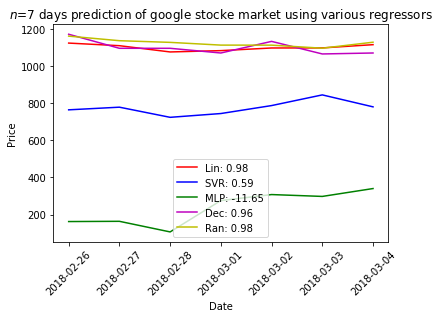

In [36]:
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import datetime as dt

last_date=df.index[-1]
#print last_date
next_date= last_date + dt.timedelta(days=1)
#print next_date

dates=[]
for i in range(n): #add 7 days
    next_date= last_date + dt.timedelta(days=i)
    dates.append(next_date)

colors=['r','b','g','m', 'y']
for j in range(len(forecast)):
    plt.plot(dates, forecast[j], '-', color=colors[j], label='{0}: {1:.2f}'.format(str(regressors[j])[:3], accuracy[j]));
plt.xticks(rotation=45)
plt.legend(loc='best') #bottom right
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('$n$=7 days prediction of google stocke market using various regressors')
plt.show()